# 高收益信贷利率

In [28]:
import datetime as dt

import pandas_datareader as pdr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

下载高收益债券收益率，ICE BofA US High Yield Index Effective Yield

In [2]:
series_id = "BAMLH0A0HYM2EY"
start_date = "2000-01-01"
end_date = "2024-04-01"

data = pdr.get_data_fred(series_id, start=start_date, end=end_date)

In [4]:
data.to_csv("../data/high_yield_bond_rates.csv", index=True)

读取BTC历史价格，合并数据，然后绘制图表

In [13]:
btc_prices = pd.read_csv("../data/bitstamp_btcusd_1d.csv", index_col=0, parse_dates=True,
                         usecols=["timestamp", "close"])
btc_prices.index.name = "date"
btc_prices

,close
date,
2012-01-01,5.00
2012-01-02,5.00
2012-01-03,5.29
2012-01-04,5.57
2012-01-05,6.65
...,...
2024-02-26,54524.00
2024-02-27,57068.00
2024-02-28,62512.00


In [12]:
high_yield_bond_rates = pd.read_csv("../data/high_yield_bond_rates.csv", index_col=0, parse_dates=True)
high_yield_bond_rates.index.name = "date"
high_yield_bond_rates.rename(columns={"BAMLH0A0HYM2EY": "bond_rate"}, inplace=True)
high_yield_bond_rates

,bond_rate
date,
2000-01-03,11.39
2000-01-04,11.43
2000-01-05,11.47
2000-01-06,11.47
2000-01-07,11.47
...,...
2024-03-11,7.50
2024-03-12,7.50
2024-03-13,7.48


In [19]:
data = pd.merge(btc_prices, high_yield_bond_rates,
                how="inner", left_index=True, right_index=True)
data.dropna(inplace=True)
data = data.loc["2012-01-01":"2024-02-29"]

In [20]:
data

,close,bond_rate
date,,
2012-01-03,5.29,8.17
2012-01-04,5.57,8.13
2012-01-05,6.65,8.12
2012-01-06,6.00,8.09
2012-01-09,6.30,8.07
...,...,...
2024-02-23,50743.00,7.61
2024-02-26,54524.00,7.63
2024-02-27,57068.00,7.67


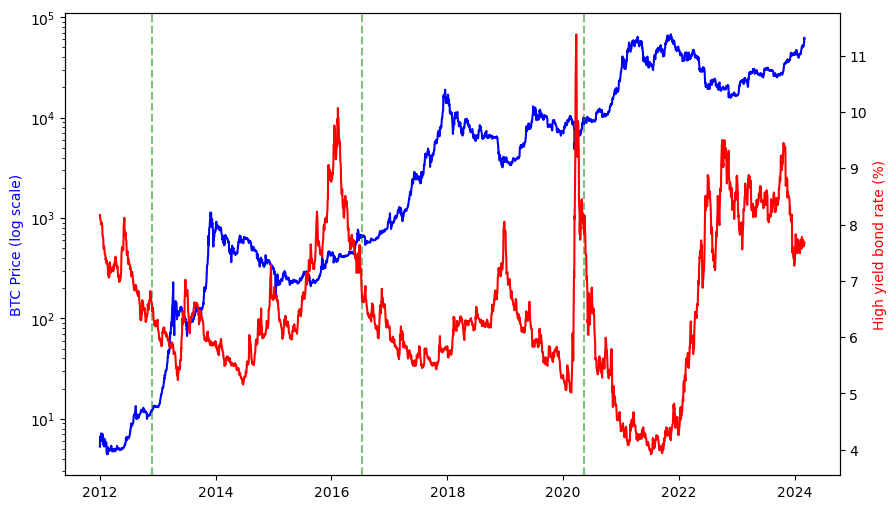

In [34]:
fig, ax1 = plt.subplots(figsize=(10, 6))

# BTC 历史收盘价，用对数刻度
ax1.plot(data.index, data["close"], label="BTC Price", color="b")
ax1.set_yscale("log")
ax1.set_ylabel("BTC Price (log scale)", color="b")

# 创建新的y轴，共享x轴
ax2 = ax1.twinx()

# 高收益债券利率
ax2.plot(data.index, data["bond_rate"], label="High yield bond rate", color="r")
ax2.set_ylabel("High yield bond rate (%)", color="r")

# 添加虚线表示BTC减半事件
halving_dates = ["2012-11-28", "2016-07-09", "2020-05-11"]
for date in halving_dates:
    date = dt.datetime.strptime(date, "%Y-%m-%d")
    ax1.axvline(x=date, color="g", linestyle="--", alpha=0.5)